In [1]:
from collections import defaultdict
import random

import numpy as np

from GoogolGame import Game
from Agent import SarsaAgent,QAgent

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

In [13]:
reward_fn =lambda win: 10 if win else -1

In [14]:
game = Game(lo=1, hi=1000, n_states=50, replace=False, reward_fn=reward_fn)

Win Percentage: 0.0928


Text(0.5, 1.0, 'Final State vs Time')

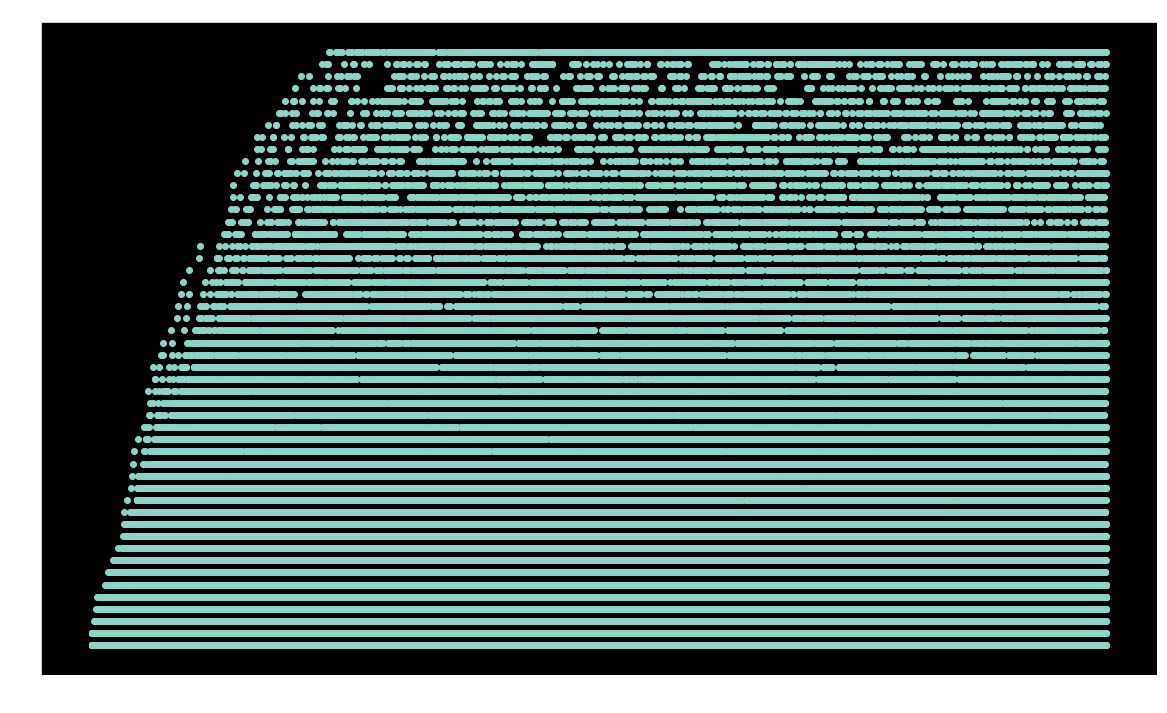

In [9]:
agent = QAgent(alpha=0.1, gamma=0.5, eps=0.1, eps_decay=1e-5, s_cost=0)

n_games = 100000

game.autoTrain(agent, n_games)

print("Win Percentage: {:.3}".format(agent.wins/n_games))
    
plt.figure(figsize=(20,12))
plt.scatter(np.arange(len(agent.final_state)), agent.final_state)
plt.ylabel("Final State")
plt.xlabel("Time")
plt.title("Final State vs Time")

Win Percentage: 0.11


Text(0.5, 1.0, 'Final State vs Time')

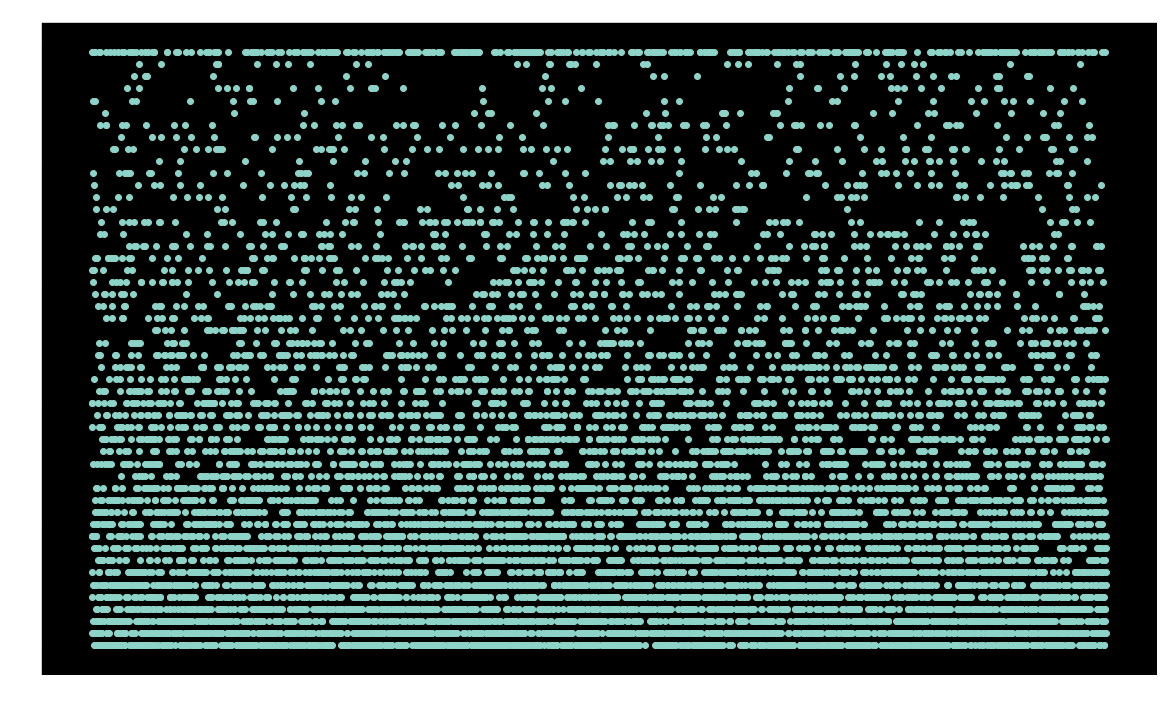

In [10]:
n_games = 10000

agent.final_state, agent.rewards, agent.wins = [], [], 0
game.autoTrain(agent, n_games)

print("Win Percentage: {:.3}".format(agent.wins/n_games))
    
plt.figure(figsize=(20,12))
plt.scatter(np.arange(len(agent.final_state)), agent.final_state)
plt.ylabel("Final State")
plt.xlabel("Time")
plt.title("Final State vs Time")

In [11]:
agent.Q

defaultdict(<function Agent.BasicAgent.__init__.<locals>.<lambda>()>,
            {'0_67': {0: -0.271, 1: 0.0},
             '0_782': {0: -0.5217031000000001, 1: 0.0},
             '0_311': {0: -0.5217031000000001, 1: 0.0},
             '0_155': {0: -0.40951000000000004, 1: 0.0},
             '0_772': {0: -0.5217031000000001, 1: 0.0},
             '0_315': {0: -0.19, 1: 0.0},
             '0_181': {0: -0.6125795110000001, 1: 0.0},
             '0_592': {0: -0.46855900000000006, 1: 0.0},
             '0_812': {0: -0.46855900000000006, 1: 0.0},
             '0_30': {0: -0.40951000000000004, 1: 0.0},
             '0_15': {0: -0.5695327900000001, 1: 0.0},
             '0_32': {0: -0.40951000000000004, 1: 0.0},
             '0_368': {0: -0.19, 1: 0.0},
             '0_64': {0: -0.46855900000000006, 1: 0.0},
             '0_921': {0: -0.1, 1: 0.0},
             '0_235': {0: -0.5695327900000001, 1: 0.0},
             '0_457': {0: -0.271, 1: 0.0},
             '0_180': {0: -0.717570463519, 1: 

In [17]:
agent.Q[keys[1000]]

{0: -0.9999999999973493, 1: 0}